### Import Libraries

In [5]:
import numpy
import pandas
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #to override the default matplotlib settings

### Loading the data

In [7]:
raw_data = pandas.read_csv('2.01.+Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


### Converting or mapping Yes to 1 and No to 0

In [18]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### We are predicting admission so the y-variable is Admitted column and the x-variable is the SAT

In [21]:
y = data['Admitted']
x1 = data['SAT']

### Creating a scatterplot

Text(0, 0.5, 'Admitted')

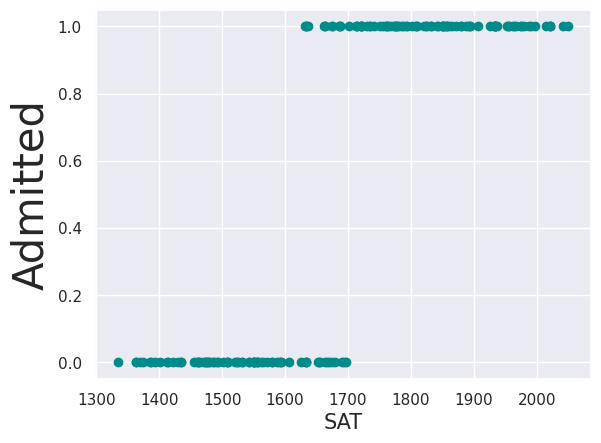

In [26]:
#The resulting scatterplot is because we are dealing with a yes or no
plt.scatter(x1,y,color='darkcyan')
plt.xlabel('SAT',fontsize=15)
plt.ylabel('Admitted',fontsize=30)

### Plotting with a regression line

/tmp/ipykernel_7333/362527999.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_line.params[1] + results_line.params[0]


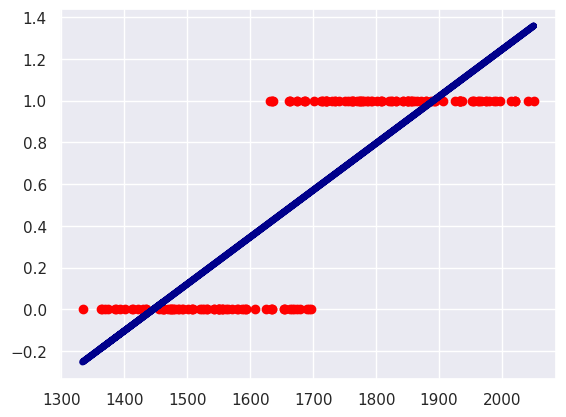

In [31]:
x = sm.add_constant(x1)
reg_line = sm.OLS(y,x)
results_line = reg_line.fit()

plt.scatter(x1,y, color='red')
y_hat = x1*results_line.params[1] + results_line.params[0]

plt.plot(x1,y_hat,lw=5,color='darkblue')
0